# 1. Import packages

In [13]:
# PIP nltk, matplotlib, wordcloud
# info on pandas: https://www.educative.io/answers/what-is-pandas-in-python
import pandas as pd
# info on RegEx: https://www.w3schools.com/python/python_regex.asp
import re
# info on NLP: https://www.techopedia.com/definition/30343/natural-language-toolkit-nltk 
import nltk
#nltk.download()

# stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords, wordnet
# Breaking given sentence into individual words:
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
lemmatize = WordNetLemmatizer()

# Warnings: https://www.geeksforgeeks.org/warnings-in-python/
import warnings
warnings.filterwarnings(action='ignore')

# text data visualization:
# info on matplotlib: https://matplotlib.org/stable/tutorials/introductory/pyplot.html
import matplotlib.pyplot as plt
%matplotlib inline
# To show most frequent words in given text
from wordcloud import WordCloud
# Info on seaborn: https://seaborn.pydata.org/tutorial/introduction
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\17406\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. Loading dataset

In [14]:
# We will be using Twitter tweets data from 1st January 2020 to 1 January 2021
tweets_df = pd.read_csv('TSLA_tweets.csv').drop(['Unnamed: 0'], axis=1)
tweets_df.head()

,id,date,tweet,retweets_count
0,1212450794705969152,2020-01-02,Fun fact: Audi registered more E-Tron's in the...,2
1,1212450579634626560,2020-01-02,That MF TSLA stock at 420.. I watch that shit ...,0
2,1212450337543602177,2020-01-02,@ICannot_Enough And on June 5 th 2019 within 2...,0
3,1212450309131227141,2020-01-02,Tesla is gaining momentum in Taiwan 🇹🇼 @TeslaO...,15
4,1212449703318753280,2020-01-02,@Schuldensuehner Now extrapolate these numbers...,0


In [15]:
# Converting argument of date column into a pandas datetime object
tweets_df.date = pd.to_datetime(tweets_df.date)

# 3. Cleaning the tweets

In [16]:
# By using RegEx
def clean(df):
    # Add whitespace to end of each tweet 
    df['cleaned_tweet'] = df.tweet.map(lambda x: x + ' ')
    # remove the http
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: re.sub(r'http.*', '', x))
    # remove special characters and numbers
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: re.sub(r'[^a-zA-Z#]', ' ', x))
    # lowercase tweets
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.lower())
    # Token tweets and remove stop words (stop means no meaning to sentence)
    stopword_list = stopwords.words('english')
    for i in range(len(df.cleaned_tweet)):
        tokens = word_tokenize(df.cleaned_tweet[i])
        clean_tokens = [w for w in tokens if w not in stopword_list]
        df.cleaned_tweet[i] = clean_tokens
                                                               
    

In [17]:
# The unsupervised trainable model algorithm to build
#nltk.download('punkt')

In [18]:
clean(tweets_df)
tweets_df.head()

,id,date,tweet,retweets_count,cleaned_tweet
0,1212450794705969152,2020-01-02,Fun fact: Audi registered more E-Tron's in the...,2,"[fun, fact, audi, registered, e, tron, netherl..."
1,1212450579634626560,2020-01-02,That MF TSLA stock at 420.. I watch that shit ...,0,"[mf, tsla, stock, watch, shit, go, damn, year,..."
2,1212450337543602177,2020-01-02,@ICannot_Enough And on June 5 th 2019 within 2...,0,"[icannot, enough, june, th, within, days, tsla..."
3,1212450309131227141,2020-01-02,Tesla is gaining momentum in Taiwan 🇹🇼 @TeslaO...,15,"[tesla, gaining, momentum, taiwan, teslaowners..."
4,1212449703318753280,2020-01-02,@Schuldensuehner Now extrapolate these numbers...,0,"[schuldensuehner, extrapolate, numbers, anothe..."


## Testing the Data:

In [19]:
tweets_df.tweet[500]

'New post (Tesla Motors, Inc. (NASDAQ:TSLA) - Canaccord Lifts Tesla Price Target Above $500 Amid International Opportunity) has been published on FUNDSWIFT -  https://t.co/UHu2I5rDkc  https://t.co/nPzi0ioFNS'

In [20]:
tweets_df.cleaned_tweet[500]

['new',
 'post',
 'tesla',
 'motors',
 'inc',
 'nasdaq',
 'tsla',
 'canaccord',
 'lifts',
 'tesla',
 'price',
 'target',
 'amid',
 'international',
 'opportunity',
 'published',
 'fundswift']

# 4. Lemmatizing the cleaned tweets

In [21]:
# Lemmatization information: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
# example: consult, consults, consulting, consulted ---> consult
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize(tweets):
    for i in range(len(tweets)):
        #POS (part of speech)-tagging each word in tweet:
        for w in [tweets[i]]:
            pos_tag_list = nltk.pos_tag(w)
        #convert the pos-tag to be wordnet compliant
        wordnet_tags = []
        for j in pos_tag_list:
            # adjective
            if j[1].startswith('J'):
                wordnet_tags.append(wordnet.ADJ)
            # noun
            elif j[1].startswith('N'):
                wordnet_tags.append(wordnet.NOUN)
            # adverb
            elif j[1].startswith('R'):
                wordnet_tags.append(wordnet.ADV)
            # verb
            elif j[1].startswith('V'):
                wordnet_tags.append(wordnet.VERB)
            # default to noun
            else:
                wordnet_tags.append(wordnet.NOUN)
        # lemmatizing each word in the tweet
        lem_words = []
        for k in range(len(tweets[i])):
            lem_words.append(lemmatizer.lemmatize(tweets[i][k], pos=wordnet_tags[k]))
        lem_tweet = ' '.join(lem_words)
        tweets[i] = lem_tweet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\17406\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
# tagging words with their pos
#nltk.download('averaged_perceptron_tagger')

In [23]:
lemmatize(tweets_df.cleaned_tweet)
tweets_df.head()

,id,date,tweet,retweets_count,cleaned_tweet
0,1212450794705969152,2020-01-02,Fun fact: Audi registered more E-Tron's in the...,2,fun fact audi register e tron netherlands q te...
1,1212450579634626560,2020-01-02,That MF TSLA stock at 420.. I watch that shit ...,0,mf tsla stock watch shit go damn year miss curve
2,1212450337543602177,2020-01-02,@ICannot_Enough And on June 5 th 2019 within 2...,0,icannot enough june th within day tsla low rep...
3,1212450309131227141,2020-01-02,Tesla is gaining momentum in Taiwan 🇹🇼 @TeslaO...,15,tesla gain momentum taiwan teslaownerstwn tsla...
4,1212449703318753280,2020-01-02,@Schuldensuehner Now extrapolate these numbers...,0,schuldensuehner extrapolate number another two...


# Removing 'tesla', 'q', and '#'

In [25]:
def remove_clean(df):
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('tesla', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('tsla', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('q', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('#', ''))

In [26]:
remove_clean(tweets_df)

In [29]:
tweets_df.cleaned_tweet[500]

'new post  motor inc nasda  canaccord lift  price target amid international opportunity publish fundswift'

# Combining tweets together into a single string

In [30]:
all_words_str = ' '.join([tweet for tweet in tweets_df.cleaned_tweet])

# making list of all words
all_words_list = all_words_str.split()

# 5. Fequency analysis figures

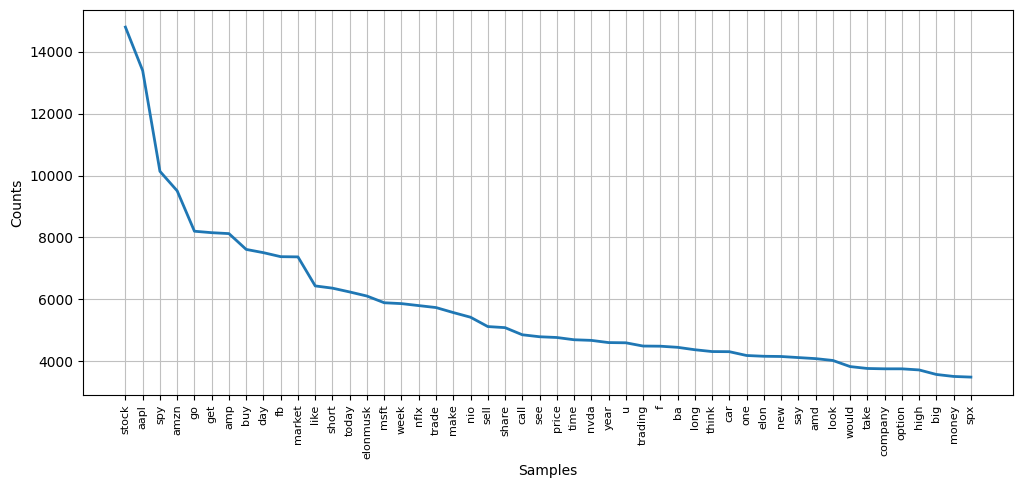

<Axes: xlabel='Samples', ylabel='Counts'>

In [52]:
# top 50 most used words:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html 

plt.figure(figsize=(12,5))
plt.xticks(fontsize=8, rotation=90)
word_freq = nltk.FreqDist(all_words_list)
word_freq.plot(50, cumulative=False)


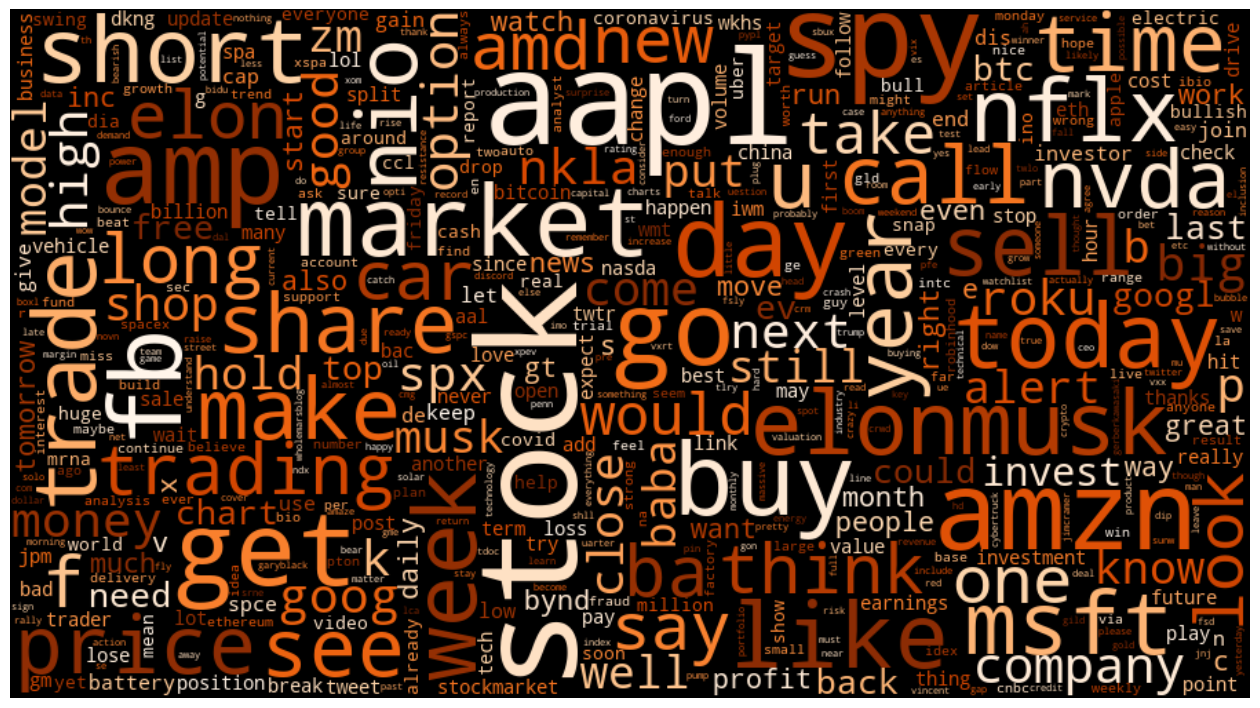

In [69]:
# Word cloud with the word frequenciesL
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

word_cloud = WordCloud(
    width=900,
    height=500,
    max_words=500,
    max_font_size=100,
    relative_scaling=0.5,
    colormap='Oranges',
    background_color='Black',
    normalize_plurals=True).generate_from_frequencies(word_freq)
plt.figure(figsize=(16,9))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()
    

In [77]:
# Table of the frequency of each word
word_freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 
                             'Count': list(word_freq.values())}).sort_values(by=['Count'], 
                              ascending=False)
word_freq_df.head(25)

,Word,Count
13,stock,14789
126,aapl,13384
301,spy,10135
129,amzn,9504
16,go,8202
66,get,8155
43,amp,8125
408,buy,7615
26,day,7510
1009,fb,7381


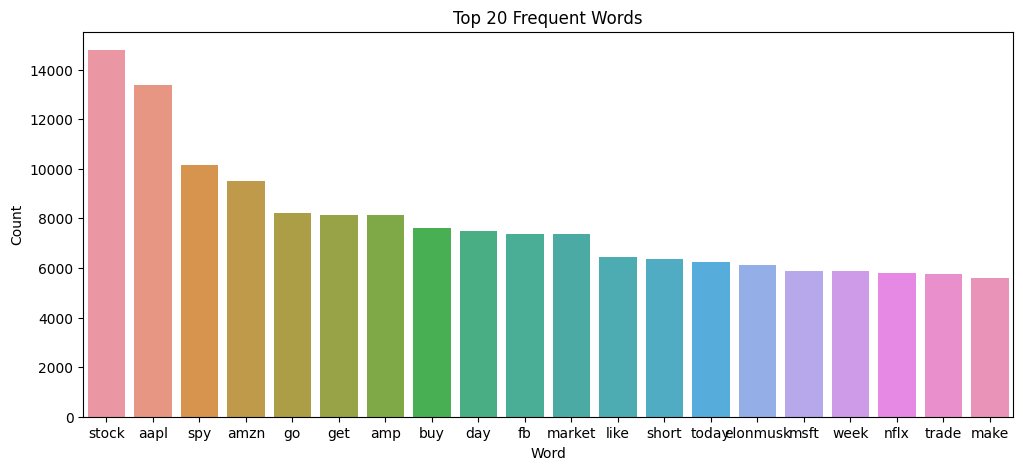

In [87]:
# Box plot
word_freq_df = word_freq_df.nlargest(columns='Count', n=20)
plt.figure(figsize=(12,5))
ax = sns.barplot(data=word_freq_df, x='Word', y='Count')
ax.set_title('Top 20 Frequent Words', fontsize=12)
plt.show()

# Saving cleaned tweets

In [91]:
tweets_df.to_csv('cleaned_tsla_tweets.csv', index=False)